In [1]:
from analytics_utils.describe_data import describe_data
from analytics_utils.interpolate import interpolate
from analytics_utils.correlate import correlate
from analytics_utils.decompose import decompose
from statsmodels.tsa.stattools import adfuller
from analytics_utils.roll import roll
from analytics_utils.ewm import ewm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Perform Dickey-Fuller test:
def dftest(df):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [3]:
# Load dataset
df = pd.read_csv('temp/bear_log.csv', parse_dates={'datetime': ['date', 'time']}, index_col='datetime').iloc[:1000,2:]
# df = pd.read_csv('temp/repsol.csv', parse_dates=['data'], index_col='data')[:1000]

In [4]:
# Show the values of bear
display(df)

,T_room,T_frame,T_Front_acc,T_Rear_acc,T_Front_alt,T_Rear_alt,Cyc_ratio_acc
datetime,,,,,,,
2001-01-15 00:00:01,30.5,31.5,31.5,31.9,31.1,30.6,0.2
2001-01-15 02:00:00,30.5,31.2,31.4,31.5,30.9,30.5,0.2
2001-01-15 04:00:00,30.0,31.1,31.2,31.4,30.8,30.1,0.2
2001-01-15 06:00:00,30.3,30.9,31.2,31.2,30.5,30.0,0.2
2001-01-15 08:00:00,30.9,30.9,31.1,31.2,30.5,30.0,0.2
2001-01-15 10:00:00,31.9,31.1,31.1,31.2,30.6,30.3,0.2
2001-01-15 12:00:00,32.0,31.4,31.2,31.4,30.8,30.8,0.2
2001-01-15 14:00:00,31.9,31.4,31.2,31.4,30.9,31.1,0.2
2001-01-15 16:00:00,31.4,31.4,31.4,31.5,30.9,31.1,0.2


---

## describe_data

describe_data(
    data_frame: pd.DataFrame, lang: str = "pt", headers: [str] = None
) -> pd.DataFrame

- langs types: {'en', 'pt'}

In [5]:
# Show the datas description
describe_data(df, lang='en')

,max,min,mean,median,1-quartile,3-quartile,variance,standard deviation,absolute deviation,amplitude,rms,kurtosis,skewness,count
header,,,,,,,,,,,,,,
T_room,44.9,28.6,36.2498,36.7,33.9,38.5,9.559600,3.091860,2.579822,16.3,36.381287,-0.610096,-0.177732,1000
T_frame,74.0,29.7,67.1782,69.0,67.6,70.6,69.448513,8.333577,4.108898,44.3,67.692611,13.696640,-3.772183,1000
T_Front_acc,85.5,29.8,60.8301,58.0,55.8,69.0,94.252617,9.708379,7.599600,55.7,61.599184,2.038380,-0.854570,1000
T_Rear_acc,74.2,29.7,59.6395,60.8,59.4,62.8,45.293183,6.730021,3.528283,44.5,60.017646,12.310956,-3.456854,1000
T_Front_alt,71.1,29.2,63.7726,65.5,63.9,67.0,60.516005,7.779203,4.027012,41.9,64.244844,12.476545,-3.552979,1000
T_Rear_alt,50.0,28.9,43.2944,44.1,42.4,45.7,16.528157,4.065484,2.748867,21.1,43.484672,3.211743,-1.767002,1000
Cyc_ratio_acc,62.1,0.0,45.4305,47.7,47.4,47.9,106.264765,10.308480,4.434589,62.1,46.584212,15.326477,-4.137565,1000


---

## correlate

correlate(
    data_frame: pd.DataFrame, method: str = "pearson", min_periods: int = 1
) -> pd.DataFrame

- methos types: {‘pearson’, ‘kendall’, ‘spearman’}

In [6]:
# Show correlation matrix datas
corr = correlate(df)
display(corr)

,T_room,T_frame,T_Front_acc,T_Rear_acc,T_Front_alt,T_Rear_alt,Cyc_ratio_acc
T_room,1.000000,0.579323,0.005032,0.599261,0.546241,0.682830,0.387958
T_frame,0.579323,1.000000,0.577606,0.978409,0.992388,0.859116,0.944277
T_Front_acc,0.005032,0.577606,1.000000,0.551499,0.565770,0.276744,0.672776
T_Rear_acc,0.599261,0.978409,0.551499,1.000000,0.971015,0.850158,0.911511
T_Front_alt,0.546241,0.992388,0.565770,0.971015,1.000000,0.888295,0.927536
T_Rear_alt,0.682830,0.859116,0.276744,0.850158,0.888295,1.000000,0.675338
Cyc_ratio_acc,0.387958,0.944277,0.672776,0.911511,0.927536,0.675338,1.000000


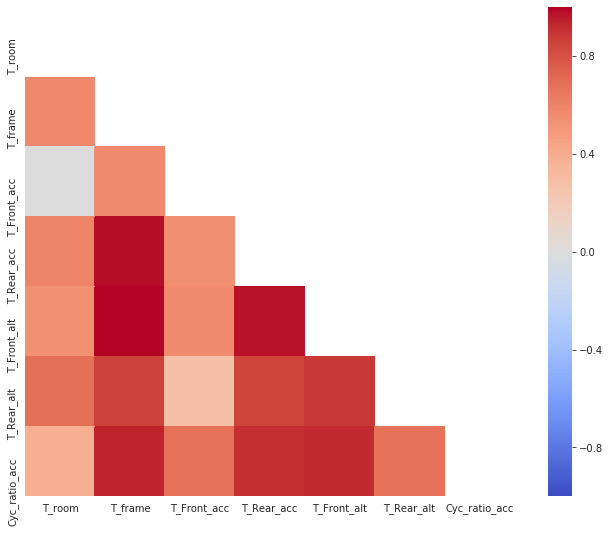

In [7]:
# Show correlation matrix
# sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.figure(figsize=(12, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', square=True)

---

## interpolate

- Please note that only method='linear' is supported for DataFrame/Series with a MultiIndex.
- methods types: {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’ ‘piecewise_polynomial’, ‘pchip’}

In [8]:
# Show interpolate linear
inter_linear = interpolate(df.iloc[:,0], method="linear")
inter_linear = inter_linear.rename(inter_linear.name+"_linear")
display(inter_linear)

datetime
2001-01-15 00:00:01    30.5
2001-01-15 02:00:00    30.5
2001-01-15 04:00:00    30.0
2001-01-15 06:00:00    30.3
2001-01-15 08:00:00    30.9
                       ... 
2025-03-15 22:00:00    34.7
2026-03-15 00:00:00    36.7
2026-03-15 02:00:00    35.9
2026-03-15 04:00:00    34.8
2026-03-15 06:00:00    33.9
Name: T_room_linear, Length: 1000, dtype: float64

In [9]:
# Show interpolate cubic
inter_cubic = interpolate(df.iloc[:,0], method="cubic")
inter_cubic = inter_cubic.rename(inter_cubic.name+"_cubic")
display(inter_cubic)

datetime
2001-01-15 00:00:01    30.5
2001-01-15 02:00:00    30.5
2001-01-15 04:00:00    30.0
2001-01-15 06:00:00    30.3
2001-01-15 08:00:00    30.9
                       ... 
2025-03-15 22:00:00    34.7
2026-03-15 00:00:00    36.7
2026-03-15 02:00:00    35.9
2026-03-15 04:00:00    34.8
2026-03-15 06:00:00    33.9
Name: T_room_cubic, Length: 1000, dtype: float64

In [10]:
# Show [0] column of time series with cubic and linear interpolate
wide_df = df.iloc[:,0].copy()
wide_df = pd.concat([wide_df, inter_linear, inter_cubic], axis=1)
display(wide_df)

,T_room,T_room_linear,T_room_cubic
datetime,,,
2001-01-15 00:00:01,30.5,30.5,30.5
2001-01-15 02:00:00,30.5,30.5,30.5
2001-01-15 04:00:00,30.0,30.0,30.0
2001-01-15 06:00:00,30.3,30.3,30.3
2001-01-15 08:00:00,30.9,30.9,30.9
2001-01-15 10:00:00,31.9,31.9,31.9
2001-01-15 12:00:00,32.0,32.0,32.0
2001-01-15 14:00:00,31.9,31.9,31.9
2001-01-15 16:00:00,31.4,31.4,31.4


/opt/anaconda3/envs/analytics-utils/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


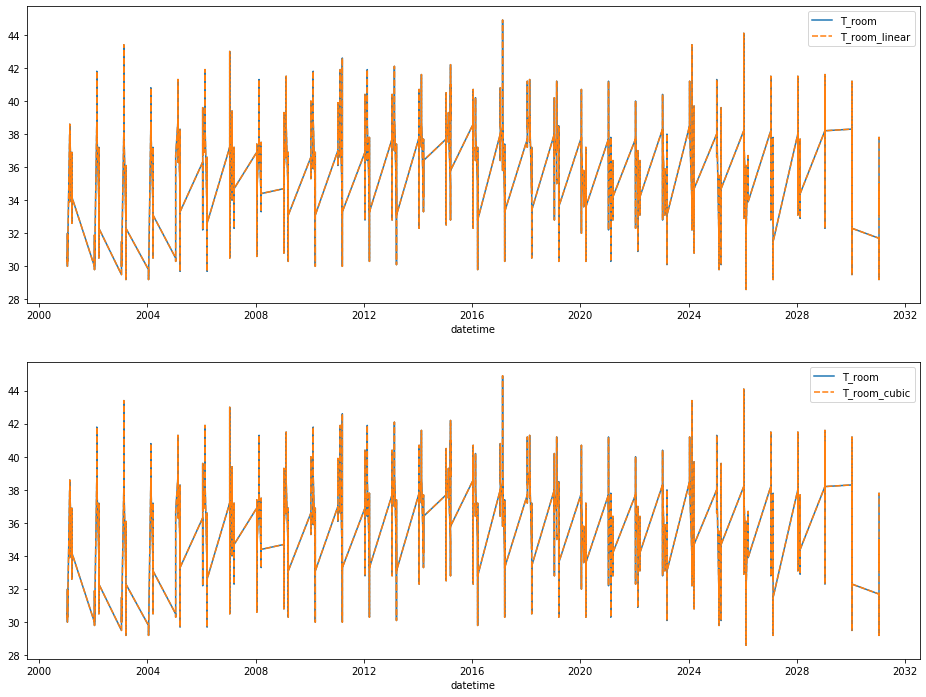

In [11]:
# Show plot [0] column of time series with cubic and linear interpolate
zero_df = df.iloc[:,0].copy()
linear_df = pd.concat([zero_df, inter_linear], axis=1)
cubic_df = pd.concat([zero_df, inter_cubic], axis=1)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.lineplot(data=linear_df, ax=ax1)
sns.lineplot(data=cubic_df, ax=ax2)

---

## roll (rolling window)

def roll(
    data_frame: pd.DataFrame,
    window: int,
    roll_type: str = "mean",
    headers: [str] = None,
) -> pd.DataFrame

- roll_type: {‘mean’, ‘var’, 'std'}

In [12]:
# Show moving average, std and var in the column zero
roll_df = cubic_df.iloc[:,1].copy()
m_roll = roll(roll_df, 24, roll_type="mean")
m_roll = m_roll.rename(m_roll.name+"_mean")
std_roll = roll(roll_df, 24, roll_type="std")
std_roll = std_roll.rename(std_roll.name+"_std")
var_roll = roll(roll_df, 24, roll_type="var")
var_roll = var_roll.rename(var_roll.name+"_var")
wide_rdf = pd.concat([roll_df, m_roll, std_roll, var_roll], axis=1)
display(wide_rdf)

,T_room_cubic,T_room_cubic_mean,T_room_cubic_std,T_room_cubic_var
datetime,,,,
2001-01-15 00:00:01,30.5,NaN,NaN,NaN
2001-01-15 02:00:00,30.5,NaN,NaN,NaN
2001-01-15 04:00:00,30.0,NaN,NaN,NaN
2001-01-15 06:00:00,30.3,NaN,NaN,NaN
2001-01-15 08:00:00,30.9,NaN,NaN,NaN
2001-01-15 10:00:00,31.9,NaN,NaN,NaN
2001-01-15 12:00:00,32.0,NaN,NaN,NaN
2001-01-15 14:00:00,31.9,NaN,NaN,NaN
2001-01-15 16:00:00,31.4,NaN,NaN,NaN


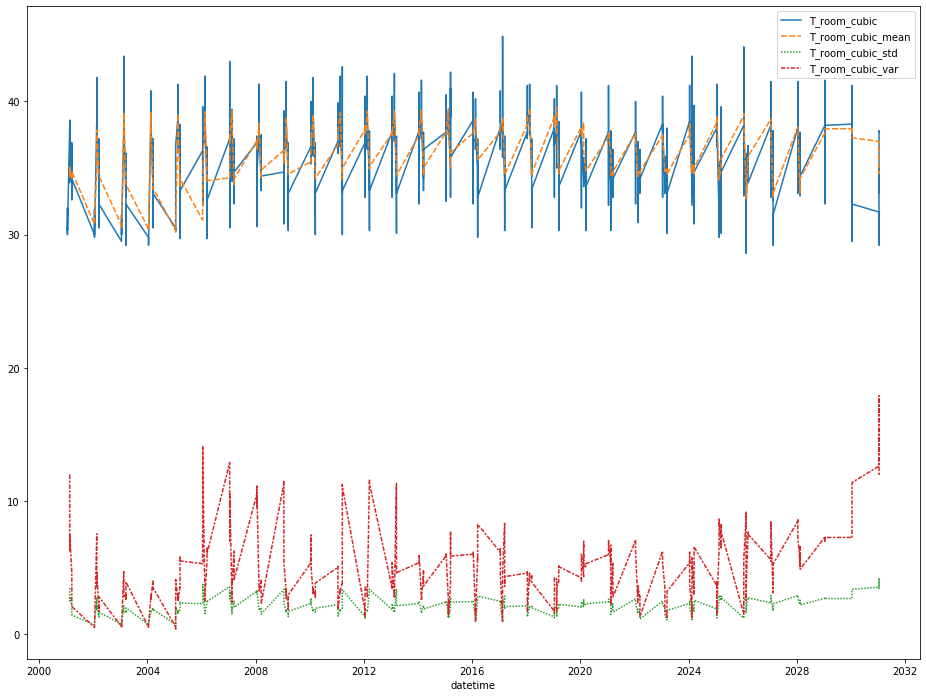

In [13]:
# Show graphic moving average, std and var in the column zero
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_rdf)

In [14]:
# Show Dickey-Fuller test
dftest(roll_df.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.276936
p-value                          0.015941
#Lags Used                      14.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64


## roll - method of stationary a time serie

In [15]:
# Show moving average, std and var in the column zero (stationary)
roll_df_stat = (roll_df - m_roll).copy()
m_roll_stat = roll(roll_df_stat, 24, roll_type="mean")
m_roll_stat = m_roll_stat.rename("stat_mean")
std_roll_stat = roll(roll_df_stat, 24, roll_type="std")
std_roll_stat = std_roll_stat.rename("stat_std")
var_roll_stat = roll(roll_df_stat, 24, roll_type="var")
var_roll_stat = var_roll_stat.rename("stat_var")
wide_rdf_stat = pd.concat([roll_df_stat, m_roll_stat, std_roll_stat, var_roll_stat], axis=1)
display(wide_rdf_stat)

,0,stat_mean,stat_std,stat_var
datetime,,,,
2001-01-15 00:00:01,NaN,NaN,NaN,NaN
2001-01-15 02:00:00,NaN,NaN,NaN,NaN
2001-01-15 04:00:00,NaN,NaN,NaN,NaN
2001-01-15 06:00:00,NaN,NaN,NaN,NaN
2001-01-15 08:00:00,NaN,NaN,NaN,NaN
2001-01-15 10:00:00,NaN,NaN,NaN,NaN
2001-01-15 12:00:00,NaN,NaN,NaN,NaN
2001-01-15 14:00:00,NaN,NaN,NaN,NaN
2001-01-15 16:00:00,NaN,NaN,NaN,NaN


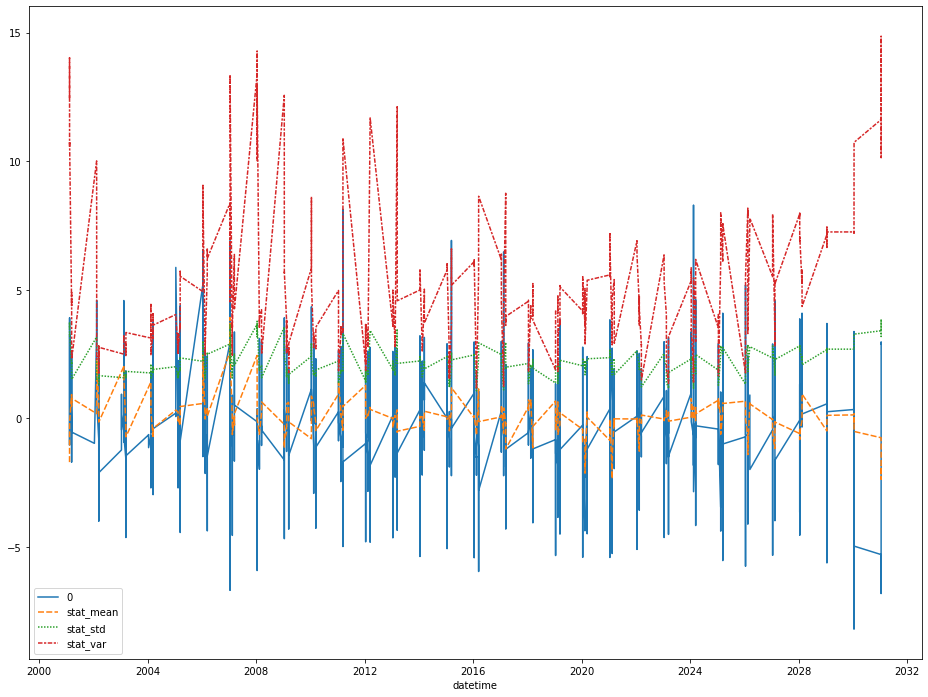

In [16]:
# Show graphic moving average, std and var in the column zero (stationary)
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_rdf_stat)

In [17]:
# Show Dickey-Fuller test (stationary)
dftest(roll_df_stat.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.089254e+00
p-value                        1.392558e-12
#Lags Used                     1.900000e+01
Number of Observations Used    9.570000e+02
Critical Value (1%)           -3.437202e+00
Critical Value (5%)           -2.864565e+00
Critical Value (10%)          -2.568381e+00
dtype: float64


---

## ewm (exponential weighted moving)

def ewm(
        data_frame: pd.DataFrame,
        com: float = None,
        span: float = None,
        halflife: float = None,
        alpha: float = None,
        ignore_na: bool = False,
        ewm_type: str = "mean",
        headers: [str] = None,
    ) -> pd.DataFrame

- com: α=1/(1+com), for com≥0
- span: α=2/(span+1), for span≥1
- halflife: α=1−exp(log(0.5)/halflife), for halflife>0
- alpha: 0<α≤1
- ewm_types: {‘mean’, ‘var’, 'std'}

In [18]:
# Show ewm average, std and var in the column zero
ewm_df = cubic_df.iloc[:,1].copy()
m_ewm = ewm(ewm_df, halflife=24, ewm_type="mean")
m_ewm = m_ewm.rename(m_ewm.name+"_mean")
std_ewm = ewm(ewm_df, halflife=24, ewm_type="std")
std_ewm = std_ewm.rename(std_ewm.name+"_std")
var_ewm = ewm(ewm_df, halflife=24, ewm_type="var")
var_ewm = var_ewm.rename(var_ewm.name+"_var")
wide_edf = pd.concat([ewm_df, m_ewm, std_ewm, var_ewm], axis=1)
display(wide_edf)

,T_room_cubic,T_room_cubic_mean,T_room_cubic_std,T_room_cubic_var
datetime,,,,
2001-01-15 00:00:01,30.5,30.500000,NaN,NaN
2001-01-15 02:00:00,30.5,30.500000,0.000000,0.000000
2001-01-15 04:00:00,30.0,30.328497,0.290742,0.084531
2001-01-15 06:00:00,30.3,30.321061,0.236104,0.055745
2001-01-15 08:00:00,30.9,30.443632,0.333392,0.111150
2001-01-15 10:00:00,31.9,30.704217,0.679502,0.461723
2001-01-15 12:00:00,32.0,30.905746,0.797828,0.636530
2001-01-15 14:00:00,31.9,31.042947,0.819758,0.672003
2001-01-15 16:00:00,31.4,31.087355,0.771298,0.594901


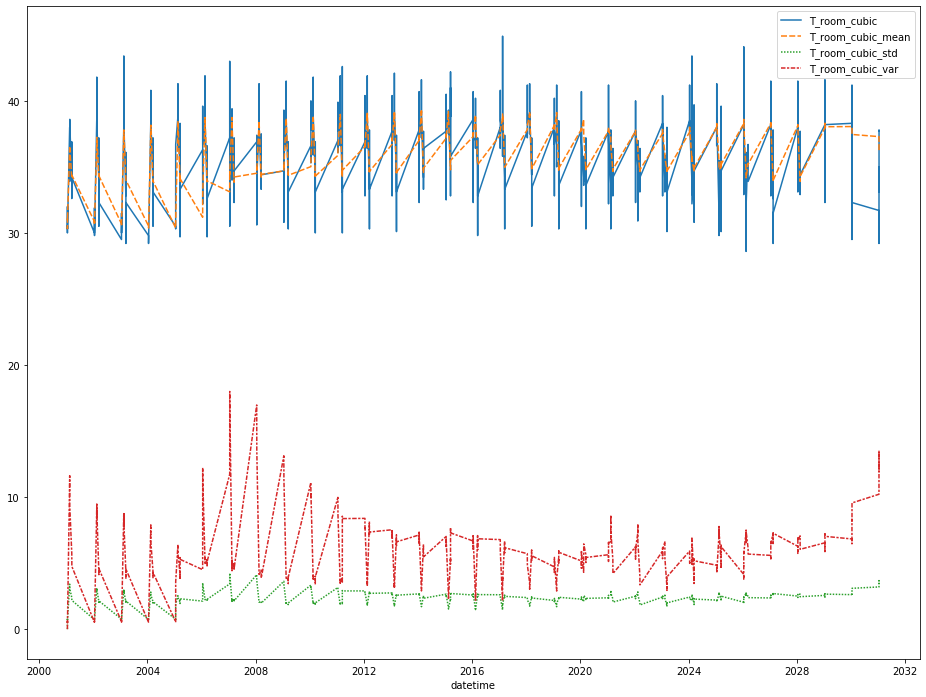

In [19]:
# Show graphic ewm average, std and var in the column zero
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_edf)

In [20]:
# Show Dickey-Fuller test (real value - mean value)
dftest(ewm_df.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.276936
p-value                          0.015941
#Lags Used                      14.000000
Number of Observations Used    985.000000
Critical Value (1%)             -3.437006
Critical Value (5%)             -2.864479
Critical Value (10%)            -2.568335
dtype: float64


## ewm - method of stationary a time serie

In [21]:
# Show ewm average, std and var in the column zero (stationary)
ewm_df_stat = (ewm_df - m_ewm).copy() # or ewm_df - ewm_df.shift() for diferentiation
m_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="mean")
m_ewm_stat = m_ewm_stat.rename("stat_mean")
std_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="std")
std_ewm_stat = std_ewm_stat.rename("stat_std")
var_ewm_stat = ewm(ewm_df_stat, halflife=24, ewm_type="var")
var_ewm_stat = var_ewm_stat.rename("stat_var")
wide_edf_stat = pd.concat([ewm_df_stat, m_ewm_stat, std_ewm_stat, var_ewm_stat], axis=1)
display(wide_edf_stat)

,0,stat_mean,stat_std,stat_var
datetime,,,,
2001-01-15 00:00:01,0.000000,0.000000,NaN,NaN
2001-01-15 02:00:00,0.000000,0.000000,0.000000,0.000000
2001-01-15 04:00:00,-0.328497,-0.112676,0.191016,0.036487
2001-01-15 06:00:00,-0.021061,-0.088771,0.161650,0.026131
2001-01-15 08:00:00,0.456368,0.026644,0.285191,0.081334
2001-01-15 10:00:00,1.195783,0.235835,0.552456,0.305207
2001-01-15 12:00:00,1.094254,0.369343,0.602968,0.363571
2001-01-15 14:00:00,0.857053,0.436644,0.582565,0.339382
2001-01-15 16:00:00,0.312645,0.421222,0.542618,0.294434


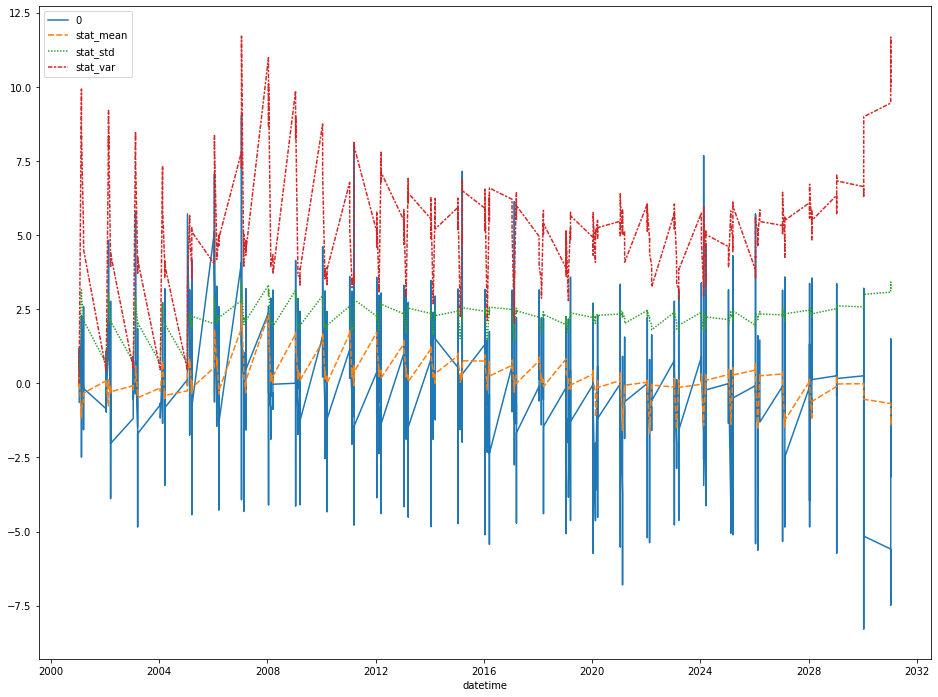

In [22]:
# Show graphic ewm average, std and var in the column zero (stationary)
fig = plt.figure(figsize=(16, 12))
ax = sns.lineplot(data=wide_edf_stat)

In [23]:
# Show Dickey-Fuller test (stationary)
dftest(ewm_df_stat.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -5.197265
p-value                          0.000009
#Lags Used                      17.000000
Number of Observations Used    982.000000
Critical Value (1%)             -3.437027
Critical Value (5%)             -2.864488
Critical Value (10%)            -2.568340
dtype: float64


---

## decompose

def decompose(
    data_frame: pd.DataFrame,
    model: str = "additive",
    filt: [] = None,
    freq: int = None,
    two_sided: bool = True,
    extrapolate_trend: int = 0,
    lang: str = "pt",
    headers: [str] = None,
) -> pd.DataFrame

- model: {“additive”, “multiplicative”}

## decompose additive

In [24]:
# Show seasonal decompose (additive)
decompose_add = decompose(inter_cubic.dropna(), model='additive', freq=24)

observed_add = decompose_add.iloc[0,0].rename("observed")
seasonal_add = decompose_add.iloc[0,1].rename("seasonal")
trend_add = decompose_add.iloc[0,2].rename("trend")
resid_add = decompose_add.iloc[0,3].rename("resid")

wide_df_add = pd.concat([observed_add, seasonal_add, trend_add, resid_add], axis=1)
wide_df_add

,observed,seasonal,trend,resid
datetime,,,,
2001-01-15 00:00:01,30.5,-0.421171,NaN,NaN
2001-01-15 02:00:00,30.5,-0.905724,NaN,NaN
2001-01-15 04:00:00,30.0,-1.347848,NaN,NaN
2001-01-15 06:00:00,30.3,-0.569291,NaN,NaN
2001-01-15 08:00:00,30.9,0.639681,NaN,NaN
2001-01-15 10:00:00,31.9,1.734525,NaN,NaN
2001-01-15 12:00:00,32.0,2.332389,NaN,NaN
2001-01-15 14:00:00,31.9,2.001660,NaN,NaN
2001-01-15 16:00:00,31.4,0.150671,NaN,NaN


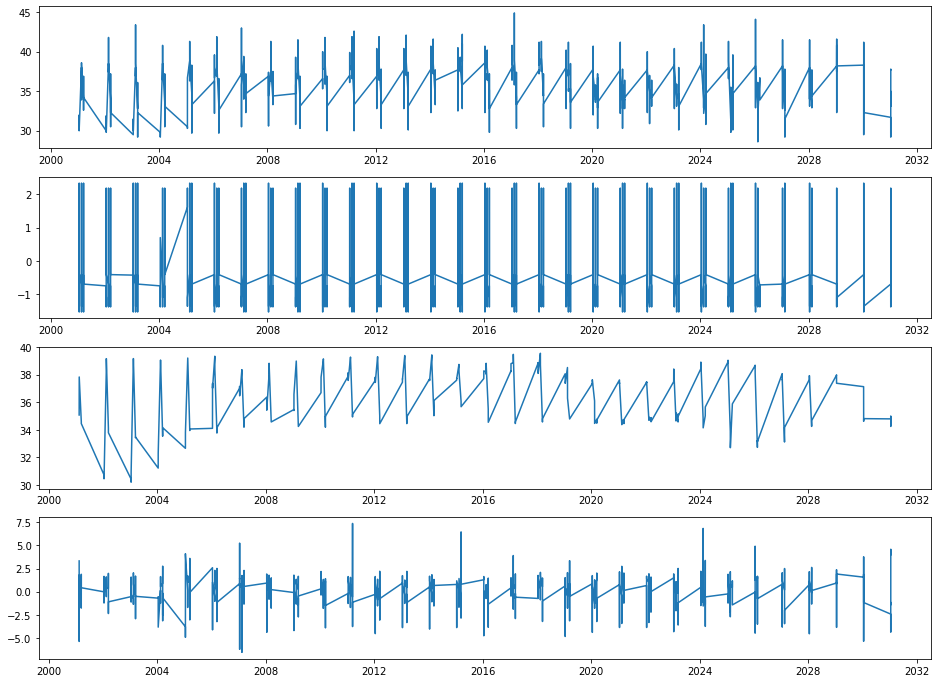

In [25]:
# Show graphic seasonal decompose (additive)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.lineplot(data=observed_add, ax=ax1)
sns.lineplot(data=seasonal_add, ax=ax2)
sns.lineplot(data=trend_add, ax=ax3)
sns.lineplot(data=resid_add, ax=ax4)

## decompose multiplicative

In [26]:
# Show seasonal decompose (multiplicative)
decompose_mult = decompose(inter_cubic.dropna(), model='multiplicative', freq=24)

observed_mult = decompose_mult.iloc[0,0].rename('observed')
seasonal_mult = decompose_mult.iloc[0,1].rename('seasonal')
trend_mult = decompose_mult.iloc[0,2].rename('tend')
resid_mult = decompose_mult.iloc[0,3].rename('resid')

wide_df_mult = pd.concat([observed_mult, seasonal_mult, trend_mult, resid_mult], axis=1)
wide_df_mult

,observed,seasonal,tend,resid
datetime,,,,
2001-01-15 00:00:01,30.5,0.988744,NaN,NaN
2001-01-15 02:00:00,30.5,0.975438,NaN,NaN
2001-01-15 04:00:00,30.0,0.963293,NaN,NaN
2001-01-15 06:00:00,30.3,0.983561,NaN,NaN
2001-01-15 08:00:00,30.9,1.016807,NaN,NaN
2001-01-15 10:00:00,31.9,1.047351,NaN,NaN
2001-01-15 12:00:00,32.0,1.064739,NaN,NaN
2001-01-15 14:00:00,31.9,1.055862,NaN,NaN
2001-01-15 16:00:00,31.4,1.006065,NaN,NaN


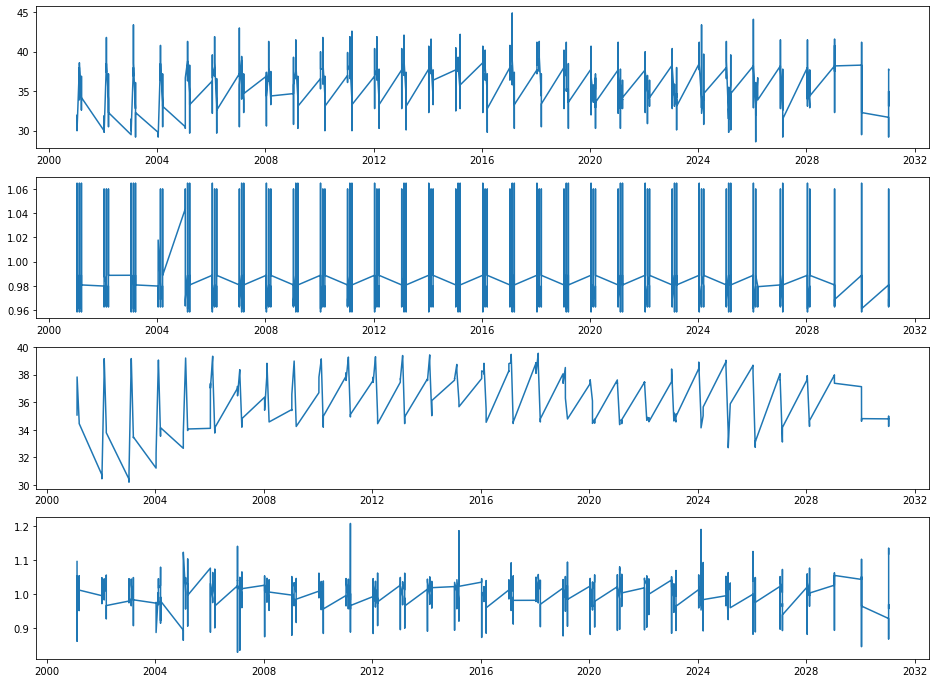

In [27]:
# Show graphic seasonal decompose (additive)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sns.lineplot(data=observed_mult, ax=ax1)
sns.lineplot(data=seasonal_mult, ax=ax2)
sns.lineplot(data=trend_mult, ax=ax3)
sns.lineplot(data=resid_mult, ax=ax4)